<a href="https://colab.research.google.com/github/openmymai/TensorFlowCert/blob/main/03_Neuron_Network_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Itnroduction to neuron network classification with TensorFlow

In this notebook we're ging to learn how to write nn for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
- Binary classificaiton
- Multiclass classification
- Multilabel classification

## creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# create cicles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand, let's visualize it.

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


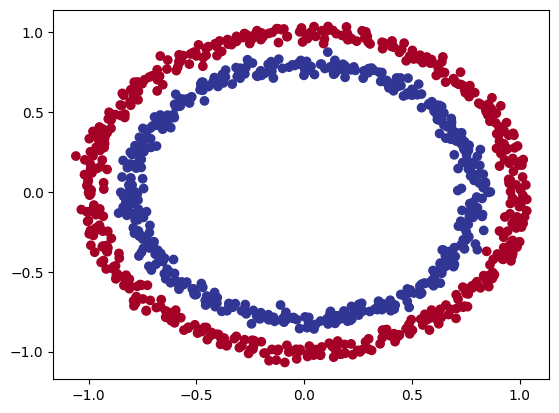

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [ ]:
# Check the shape of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [ ]:
# view the example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modeling with TF are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [ ]:
# Import tensorflow
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 5s 3ms/step - loss: 6.0560 - accuracy: 0.4970
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 5.9971 - accuracy: 0.5150
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 5.9318 - accuracy: 0.5140
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 5.0309 - accuracy: 0.5310
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 4.6326 - accuracy: 0.5310


In [ ]:
# let's try and improve our model by training longer
model_1.fit(X, y, epochs=100, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932450532913208, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy., it's performing as if it's guessing.

So let's step things up a notch and add extra layer.

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_2.evaluate(X, y)
# still low accuracy !! even more layers

32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000


[0.6938245296478271, 0.5]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

### Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - add more layers or increase the no. of hidden units within a layers
2. Compile the model - choose different optimization
3. Fit the model - train longer

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.5070


[0.6986532807350159, 0.5070000290870667]

### Create function to view why our model not so good

To visualize our model's predictions, let's create a function `plot_decision_boundary()`.config

* Take in a trained model, features (X), label (y)
* Create a **meshgrid** of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones(where each unique class falls)

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plot the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


In [ ]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

313/313 [==============================] - 0s 1ms/step
doing binary classification


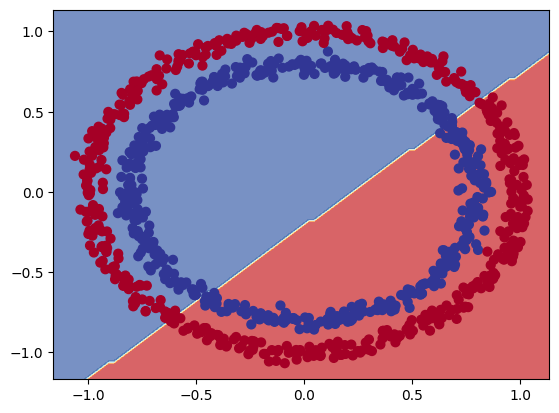

In [ ]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

# that's why only 50% accuracy

In [ ]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range (100, 1100, 5) # y= X + 100

# Split our regression data into training and test data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
#model_3.fit(X_reg_train, y_reg_train, epochs=100)

# !!! we compile our model_3 in binary classification but use it for regression

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None,1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 445.6294 - mae: 445.6294
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 356.9353 - mae: 356.9353
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 298.4648 - mae: 298.4648
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 263.2802 - mae: 263.2802
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 256.5835 - mae: 256.5835
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 259.8517 - mae: 259.8517
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 258.1008 - mae: 258.1008
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 255.2856 - mae: 255.2856
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 259.9921 - mae: 259.9921
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 256.7151 - mae: 256.7151
Epoch 11/100
5/5 [=====================

2/2 [==============================] - 0s 5ms/step


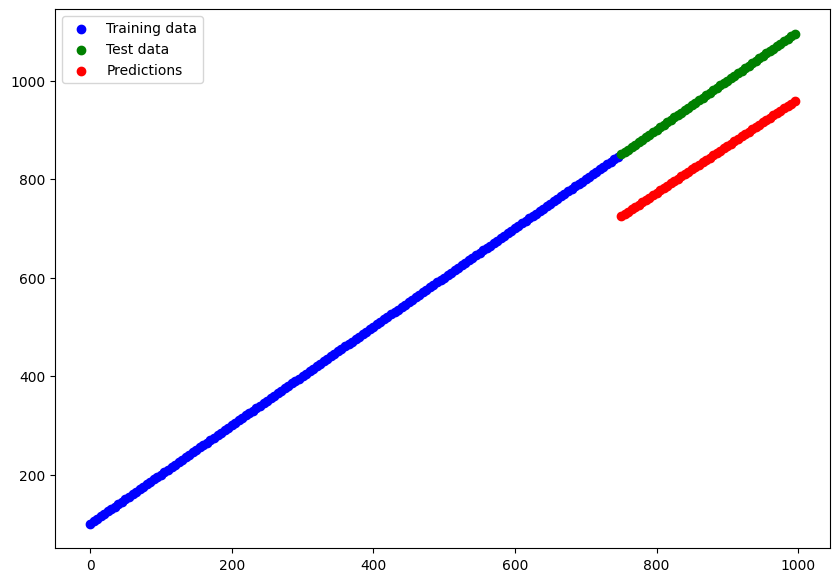

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=1))

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

### The missing piece: Non linearity

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 4.2995 - accuracy: 0.4470
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2491 - accuracy: 0.4500
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2168 - accuracy: 0.4560
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1364 - accuracy: 0.4570
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0865 - accuracy: 0.4590
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0456 - accuracy: 0.4590
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0371 - accuracy: 0.4620
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0336 - accuracy: 0.4630
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0309 - accuracy: 0.4620
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0184 - accuracy: 0.4630
Epoch 11/

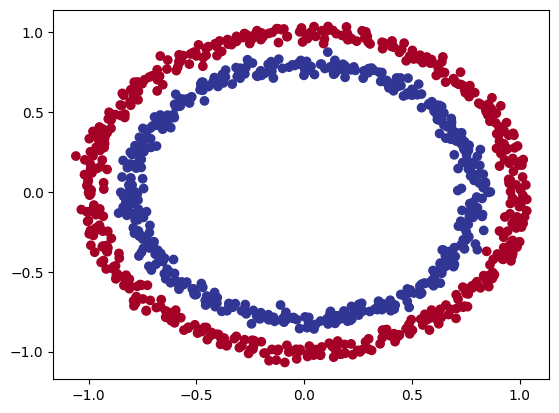

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


313/313 [==============================] - 0s 1ms/step
doing binary classification


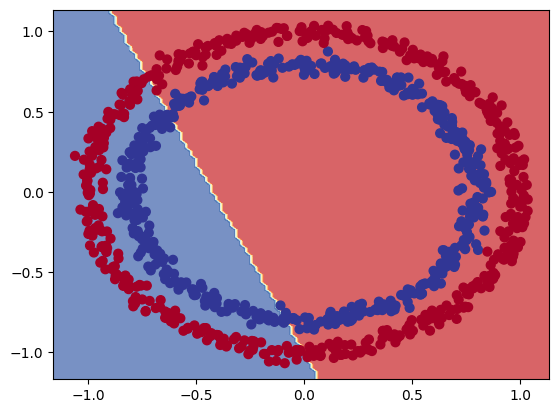

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.6210 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8486 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7768 - accuracy: 0.4430
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7601 - accuracy: 0.4030
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7508 - accuracy: 0.3650
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7446 - accuracy: 0.3790
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7404 - accuracy: 0.3330
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7380 - accuracy: 0.3350
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7349 - accuracy: 0.3150
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7324 - accuracy: 0.3830
Epoch 11/

313/313 [==============================] - 1s 1ms/step
doing binary classification


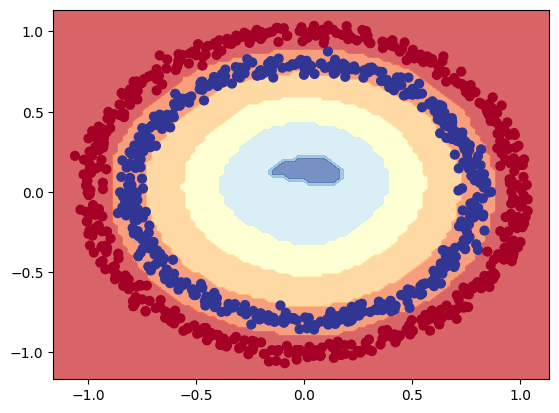

In [ ]:
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

In [ ]:
# create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

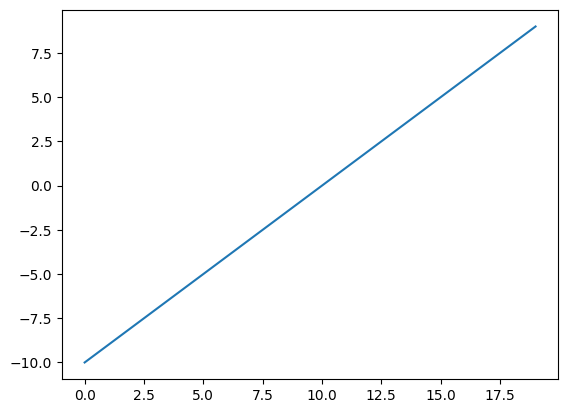

In [ ]:
# Visualize our toy
plt.plot(A)

In [ ]:
# apply sigmoid 1/(1+e-z)
# let's start by replicating sigmoid - sigmoid(x) = 1 / (1+exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

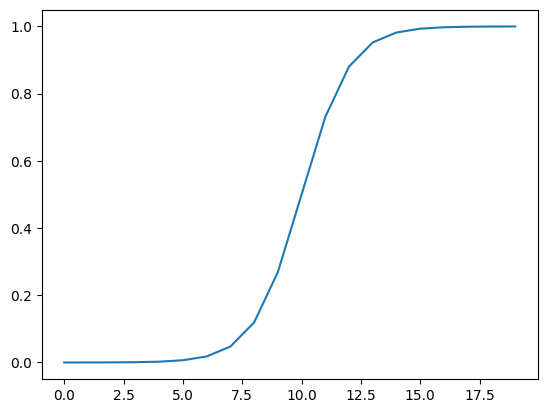

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
# let's recreate relu functions
def relu(x):
  return tf.maximum(0, x)

# relu -> f(x) = max(0,x)
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

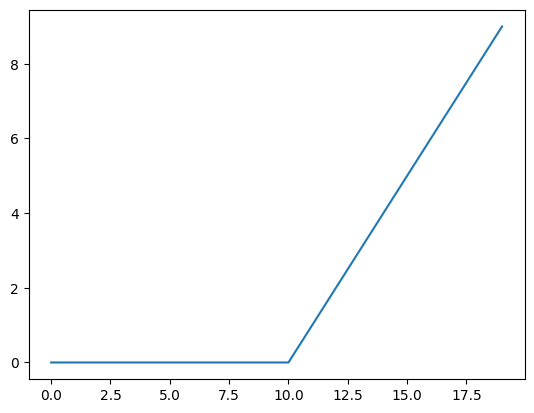

In [ ]:
plt.plot(relu(A))

In [ ]:
# let's try the linear activation functions
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

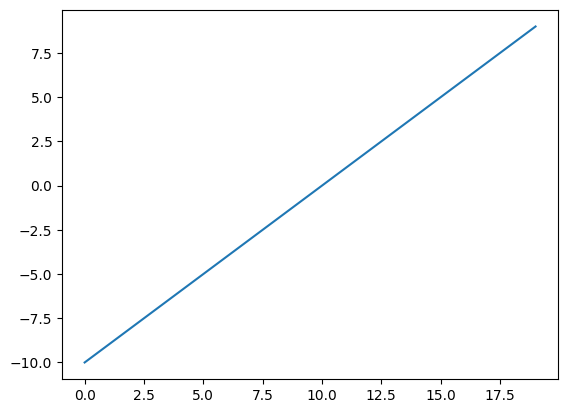

In [ ]:
# changes?
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

### Evaluating and improving our classification

In [ ]:
# Train, Test split
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the test data

# set random seed
tf.random.set_seed(42)

# 1. create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6912 - accuracy: 0.5013
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5350
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.5400
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.6300
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6501 - accuracy: 0.6212
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6288 - accuracy: 0.6825
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6004 - accuracy: 0.7750
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5642 - accuracy: 0.7650
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5102 - accuracy: 0.8100
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4550 - accuracy: 0.8825
Epoch 11/25
25/25 [

In [ ]:
# 4. Evaluate the model ont he test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1220 - accuracy: 0.9700


[0.12195644527673721, 0.9700000286102295]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


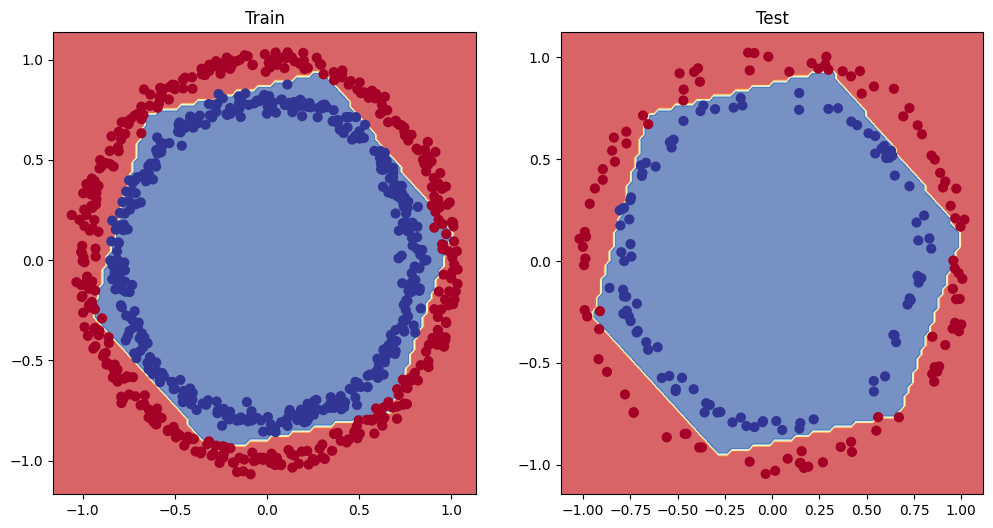

In [ ]:
# plot the decision bouraries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [ ]:
model_8.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 12        
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### Plot the loss (or training) curves

history.history

{'loss': [0.6912426948547363,
  0.6849219799041748,
  0.6759512424468994,
  0.6656962633132935,
  0.6501160264015198,
  0.628760039806366,
  0.6003882884979248,
  0.5642039775848389,
  0.5101721286773682,
  0.45498356223106384,
  0.4138140082359314,
  0.37294840812683105,
  0.32704269886016846,
  0.29227080941200256,
  0.26212894916534424,
  0.2318887710571289,
  0.20357316732406616,
  0.1930982619524002,
  0.1783505380153656,
  0.16580089926719666,
  0.15534591674804688,
  0.14779818058013916,
  0.1334463357925415,
  0.13416653871536255,
  0.144216850399971],
 'accuracy': [0.5012500286102295,
  0.5350000262260437,
  0.5400000214576721,
  0.6299999952316284,
  0.6212499737739563,
  0.6825000047683716,
  0.7749999761581421,
  0.7649999856948853,
  0.8100000023841858,
  0.8824999928474426,
  0.8837500214576721,
  0.8949999809265137,
  0.9225000143051147,
  0.9375,
  0.9524999856948853,
  0.9574999809265137,
  0.96875,
  0.9674999713897705,
  0.9662500023841858,
  0.9587500095367432,
  0.

In [ ]:
# Convert history into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.691243,0.50125
1,0.684922,0.53500
2,0.675951,0.54000
3,0.665696,0.63000
4,0.650116,0.62125
5,0.628760,0.68250
6,0.600388,0.77500
7,0.564204,0.76500
8,0.510172,0.81000
9,0.454984,0.88250


Text(0.5, 1.0, 'Model_8 loss curves')

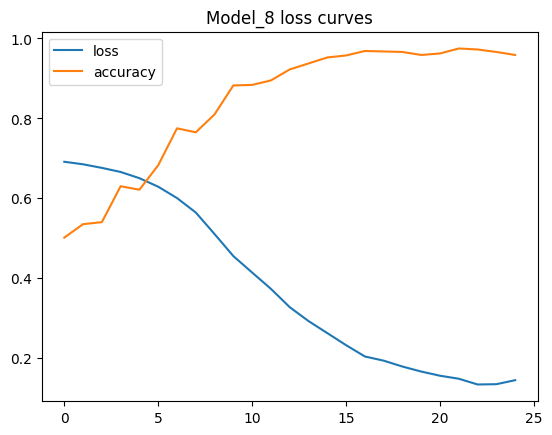

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during traing) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.


In [ ]:
# set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Crate a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_9 = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7101 - accuracy: 0.5088 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7096 - accuracy: 0.5088 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7091 - accuracy: 0.5100 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7085 - accuracy: 0.5100 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7079 - accuracy: 0.5088 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7073 - accuracy: 0.5088 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7065 - accuracy: 0.5088 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7059 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

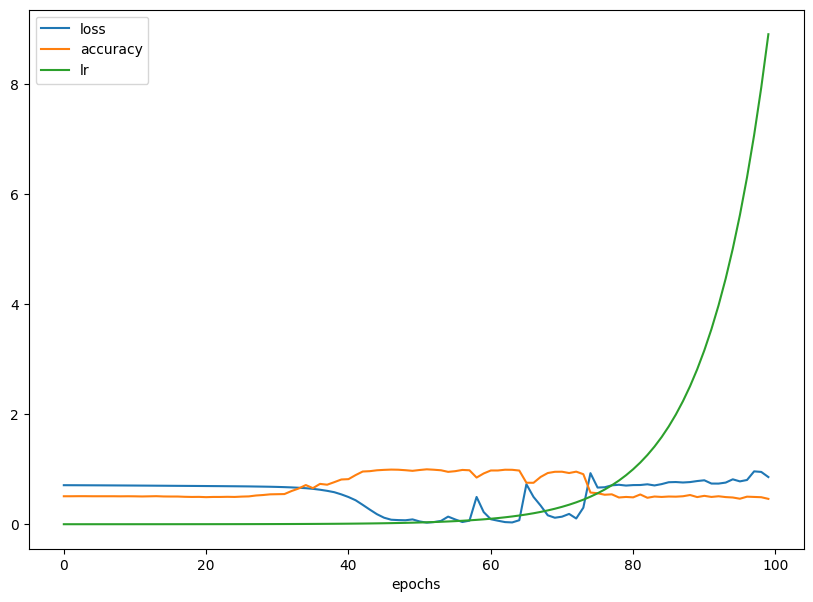

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

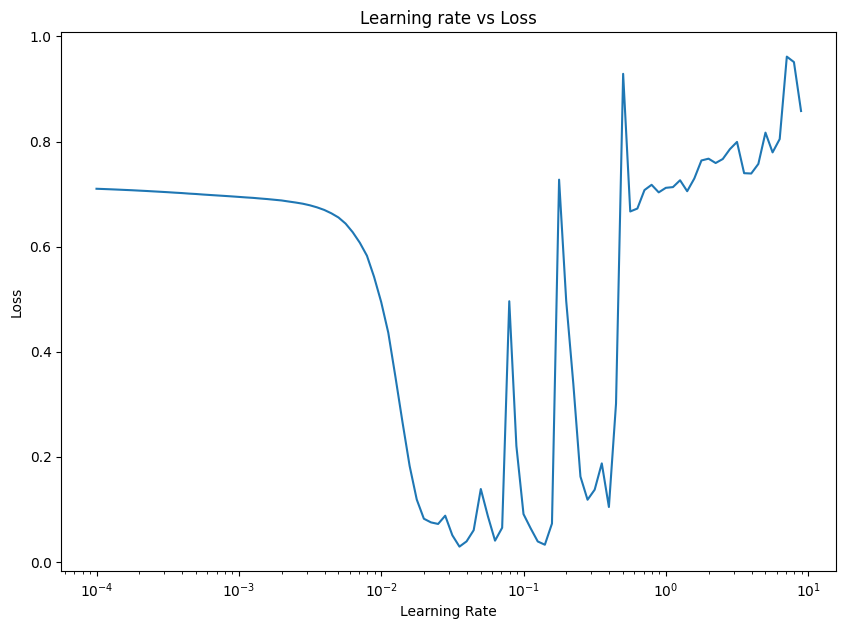

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [ ]:
# Example of other typical leanring rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
10**-2

0.01

In [ ]:
# Let's try using a higher *ideal* learning rate with the same model

# set random seed
tf.random.set_seed(42)

# create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6883 - accuracy: 0.5138
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6840 - accuracy: 0.5500
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5475
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.5962
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6140 - accuracy: 0.6850
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5679 - accuracy: 0.7362
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5259 - accuracy: 0.7775
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7887
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4677 - accuracy: 0.8175
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4189 - accuracy: 0.8388
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1163 - accuracy: 0.9800


[0.11631537228822708, 0.9800000190734863]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


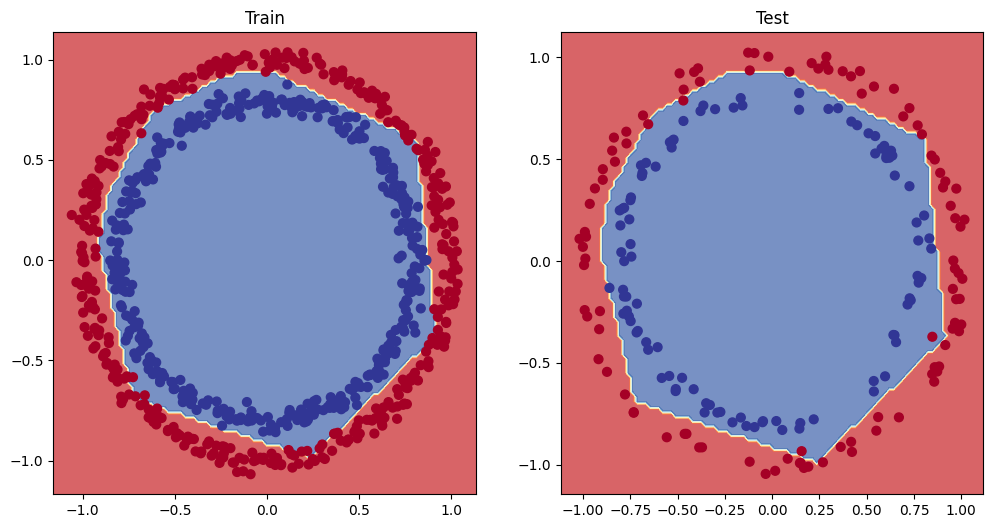

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-Score
* Confusion Matrix
* Classification report (from sklearn)



In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.1163 - accuracy: 0.9800
Model loss on the test set: 0.11631537228822708
Model accuracy on the test set: 98.00%


### How about a confusion matrix?

In [ ]:
# Create a configusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 3ms/step


ValueError: ignored

In [ ]:
y_test[:10], y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([[0.92526126],
        [0.92526126],
        [0.92526126],
        [0.92526126],
        [0.05969328],
        [0.0080661 ],
        [0.9066469 ],
        [0.12566718],
        [0.92526126],
        [0.07493871]], dtype=float32))

### Looks like our prediction array has come out in **prediction probability form**.
The standard output from the sigmoid (or softmax) activation functions.

In [ ]:
### Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[97,  4],
       [ 0, 99]])

### How about we prettify our confusion matrix?

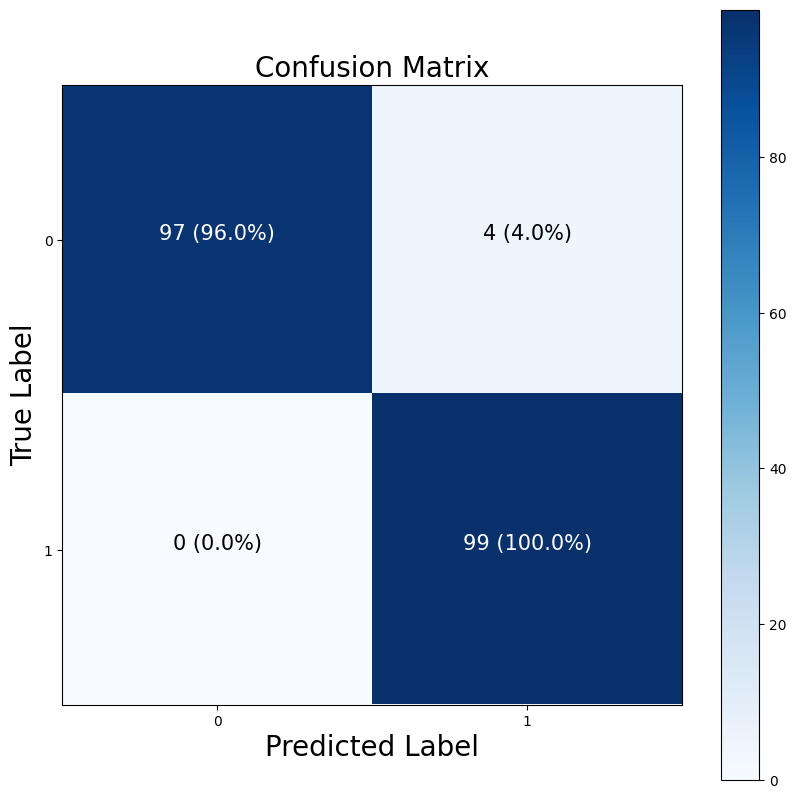

In [ ]:
import itertools

figsize=(10,10)

# create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)



In [ ]:
cm_norm


array([[0.96039604, 0.03960396],
       [0.        , 1.        ]])

### Working with a larger example (multiclass classification)

When you have more than 2 classes as an option -> multi-class classification



In [ ]:
# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

2.12.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# traintest data sorted already
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Show the first training example
print(f"Training sample: \n {train_data[0]}\n")
print(f"Training label: \n{train_labels[0]}\n")

Training sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

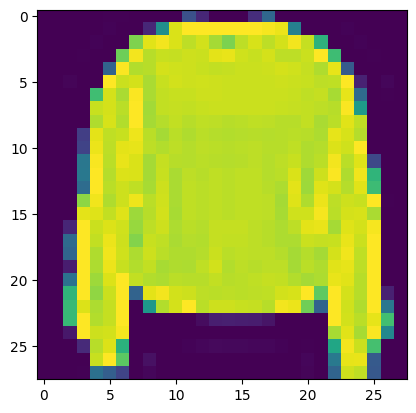

In [ ]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
# Check out sample label
train_labels[7]

2

In [ ]:
# Create a small list label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Bag')

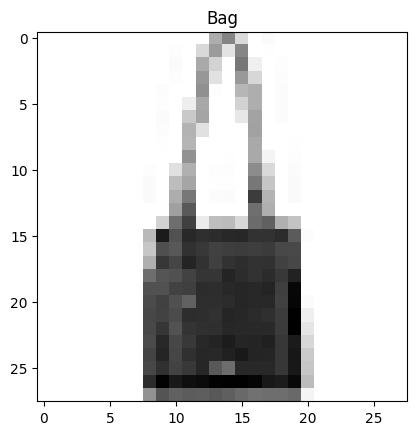

In [ ]:
# plt an example image and its label
index_mnist = 200
plt.imshow(train_data[index_mnist], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_mnist]])

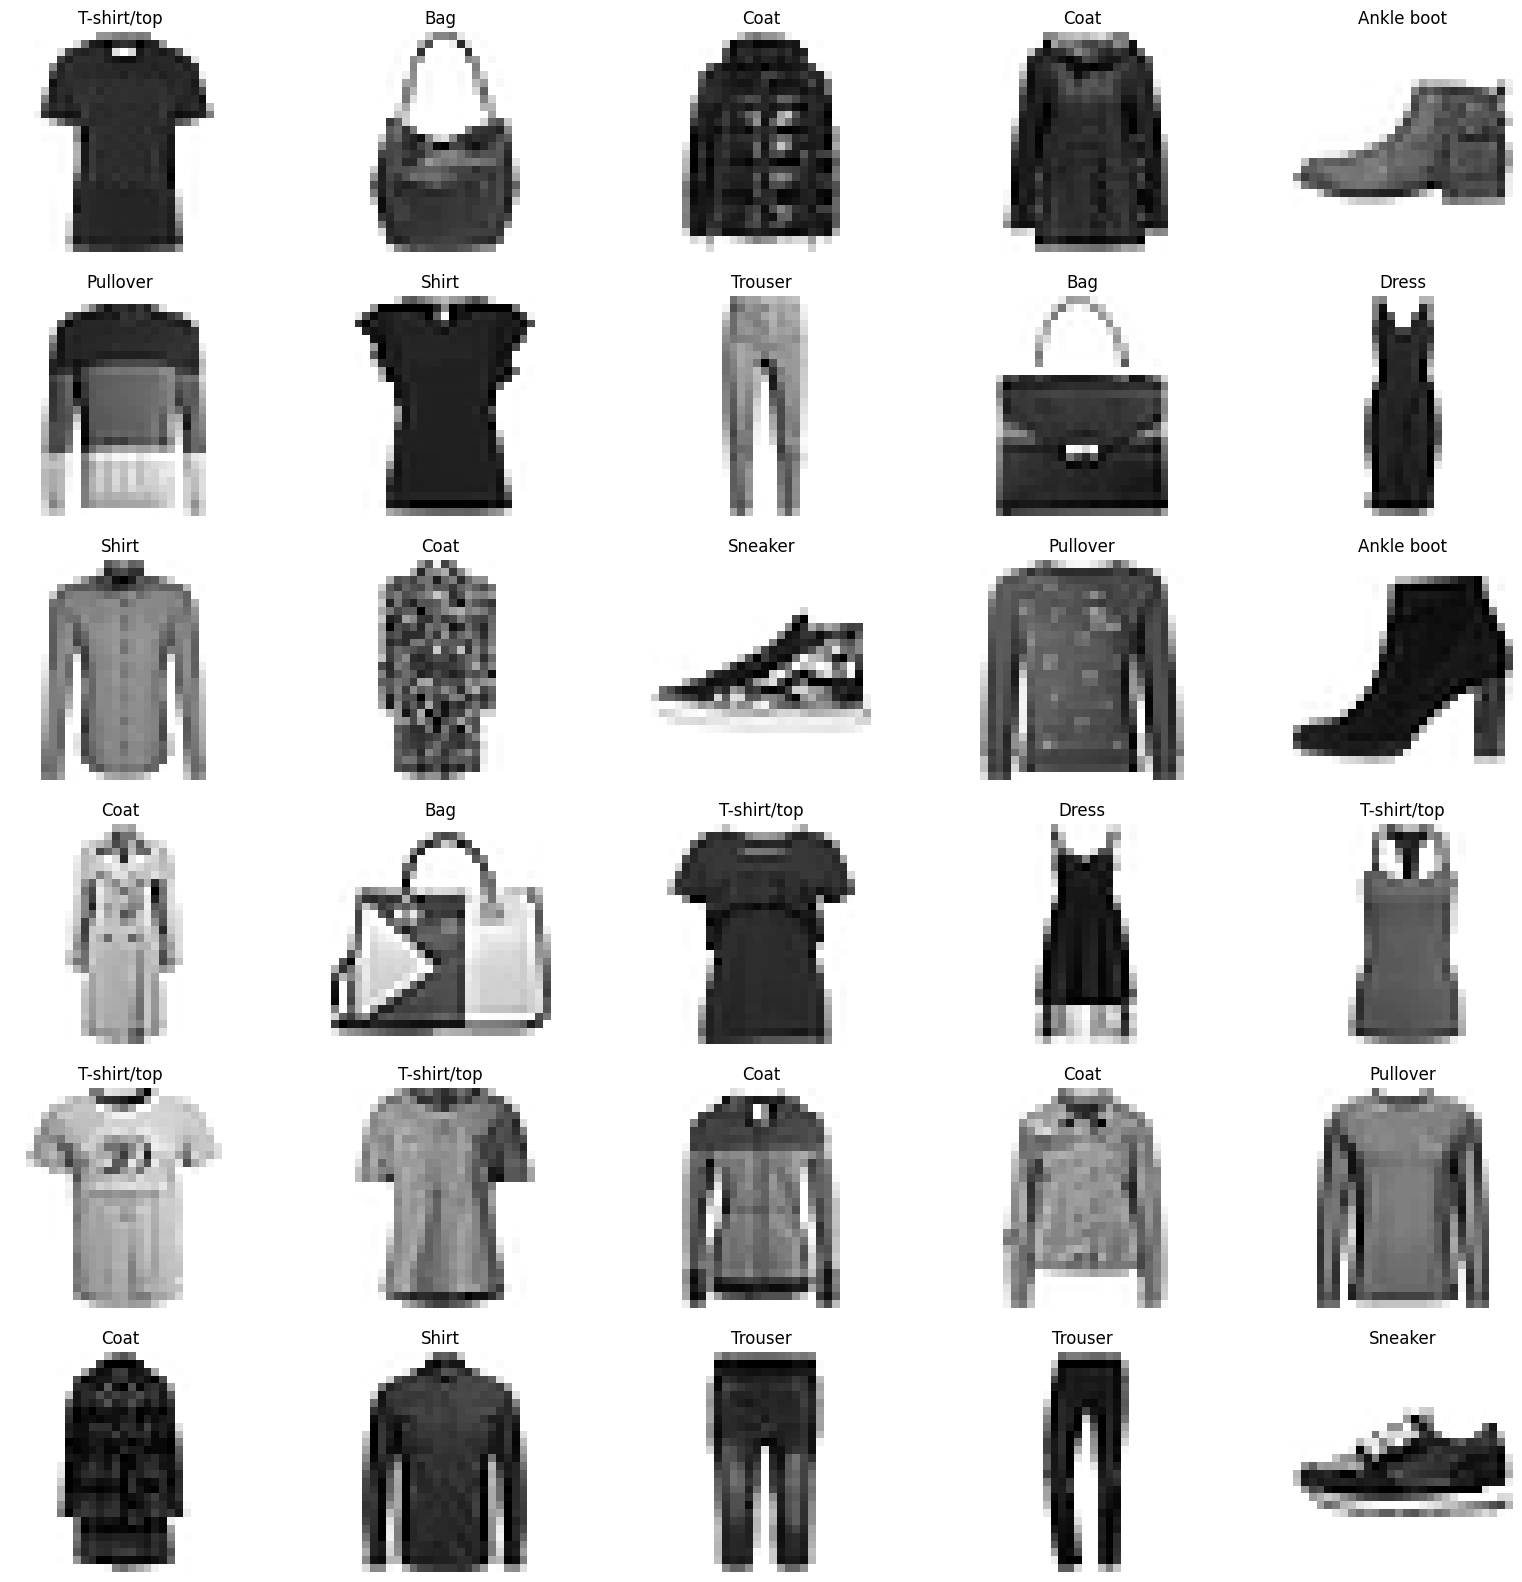

In [ ]:
# Plot multiple random images
import random
plt.figure(figsize=(20,20))
for i in range(30):
  ax = plt.subplot(6,5,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)


### Building a multi-class classification model

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
# Normalize data
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_12.compile(loss='sparse_categorical_crossentropy',
                 optimizer='Adam',
                 metrics=['accuracy'])

# Fit the model
norm_history_12 = model_12.fit(train_data_norm,
                               train_labels,
                               epochs=5,
                               validation_data=(test_data_norm, test_labels))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4973 - accuracy: 0.8249 - val_loss: 0.4241 - val_accuracy: 0.8468
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3750 - accuracy: 0.8644 - val_loss: 0.4578 - val_accuracy: 0.8446
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3362 - accuracy: 0.8769 - val_loss: 0.3781 - val_accuracy: 0.8630
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3120 - accuracy: 0.8865 - val_loss: 0.3858 - val_accuracy: 0.8617
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2934 - accuracy: 0.8928 - val_loss: 0.3568 - val_accuracy: 0.8741


In [ ]:
norm_history_12.history

{'loss': [0.49730098247528076,
  0.3749508559703827,
  0.3362358510494232,
  0.3119628131389618,
  0.2933604419231415],
 'accuracy': [0.824916660785675,
  0.8643666505813599,
  0.876883327960968,
  0.8865000009536743,
  0.892799973487854],
 'val_loss': [0.42411699891090393,
  0.45778509974479675,
  0.37814661860466003,
  0.3858362138271332,
  0.3567544221878052],
 'val_accuracy': [0.8468000292778015,
  0.8446000218391418,
  0.8629999756813049,
  0.8616999983787537,
  0.8741000294685364]}

<Axes: title={'center': 'Normalized history'}>

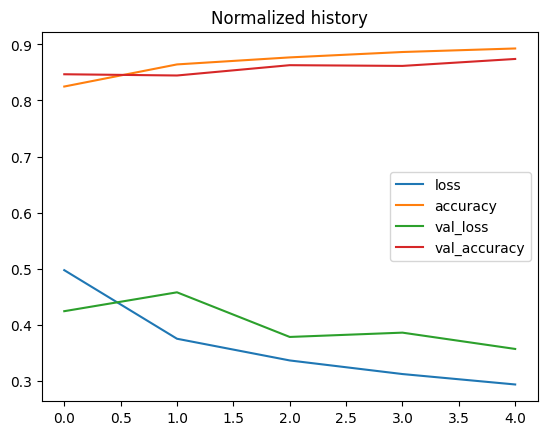

In [ ]:
import pandas as pd
pd.DataFrame(norm_history_12.history).plot(title="Normalized history")

### Finding ideal learning rate

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create a model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_13.compile(loss='sparse_categorical_crossentropy',
                 optimizer='Adam',
                 metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler_13 = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=10,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler_13])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4940 - accuracy: 0.8272 - val_loss: 0.4177 - val_accuracy: 0.8490 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3731 - accuracy: 0.8655 - val_loss: 0.4587 - val_accuracy: 0.8434 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3393 - accuracy: 0.8777 - val_loss: 0.3791 - val_accuracy: 0.8603 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3189 - accuracy: 0.8834 - val_loss: 0.4039 - val_accuracy: 0.8553 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3051 - accuracy: 0.8868 - val_loss: 0.3651 - val_accuracy: 0.8716 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2972 - accuracy: 0.8899 - val_loss: 0.3985 - val_accuracy: 0.8531 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

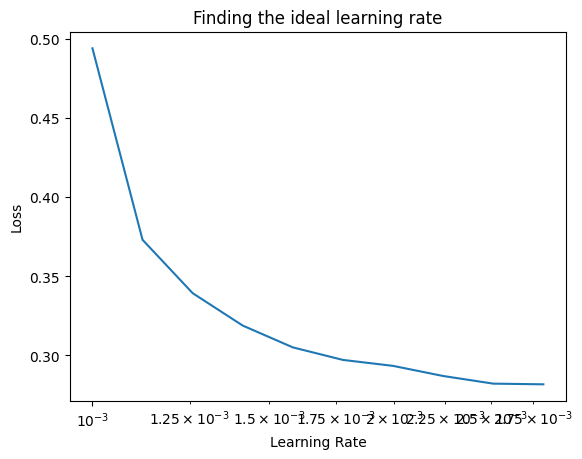

In [ ]:
# Plot the learning rate
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(10)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")